In [55]:
# import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

from scipy import stats

# SkLearn
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from collections import Counter

In [19]:
# Set matplotlib inline
%matplotlib inline
from pandas.plotting import scatter_matrix
rcParams['figure.figsize'] = 5,4

In [20]:
# Importing CSV Data
global_df = pd.read_csv('country_level_data_0.csv')
global_df.head()

,iso3c,region_id,country_name,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,...,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured
0,ABW,LCN,Aruba,HIC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.0,NaN,89.0,NaN,NaN
1,AFG,SAS,Afghanistan,LIC,2.141361e+10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
2,AGO,SSF,Angola,LMC,1.030423e+11,51.8,6.7,4.4,11.50,11.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALB,ECS,Albania,UMC,1.347108e+10,51.4,4.5,4.8,15.21,9.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Some disposal sites
4,AND,ECS,Andorra,HIC,3.319880e+09,31.2,8.2,2.6,11.60,35.1,...,NaN,52.1,NaN,NaN,NaN,NaN,NaN,47.9,NaN,NaN


In [147]:
# Cleaning Dataframe
clean_global_df = global_df[['region_id','country_name','gdp','population_population_number_of_people','total_msw_total_msw_generated_tons_year',]]

# Adding Normalised GDP and Normalised Waste Disposal Columns
clean_global_df['Normalised GDP'] = 'abc'
clean_global_df['Normalised Annual Total MSW'] = 'abc'

# Normalising gdp with population
for i in range(0, len(clean_global_df['country_name'])):
    clean_global_df['Normalised GDP'][i] = round(round(clean_global_df['gdp'][i])/round(clean_global_df['population_population_number_of_people'][i]),0)
    clean_global_df['Normalised Annual Total MSW'][i] = clean_global_df['total_msw_total_msw_generated_tons_year'][i]/(clean_global_df['population_population_number_of_people'][i])
    
clean_global_df.rename(columns={'population_population_number_of_people':'population','total_msw_total_msw_generated_tons_year':'total msw'}, inplace=True) 
clean_global_df.head()

,region_id,country_name,gdp,population,total msw,Normalised GDP,Normalised Annual Total MSW
0,LCN,Aruba,NaN,103187.0,8.813202e+04,NaN,0.8541
1,SAS,Afghanistan,2.141361e+10,34656032.0,5.628525e+06,618,0.162411
2,SSF,Angola,1.030423e+11,25096150.0,4.213644e+06,4106,0.1679
3,ECS,Albania,1.347108e+10,2880703.0,1.142964e+06,4676,0.396766
4,ECS,Andorra,3.319880e+09,82431.0,4.300000e+04,40275,0.521648


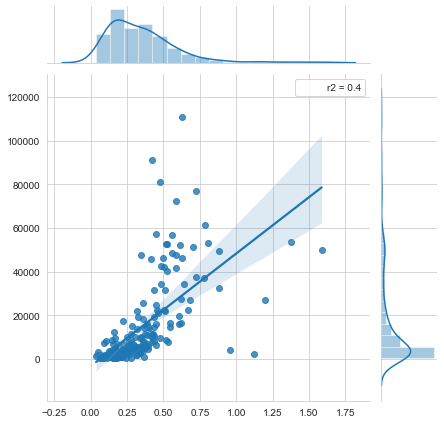

In [64]:
# Graph of 'Normalised Annual Total MSW' and 'Normalised GDP'

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
x = clean_global_df['Normalised Annual Total MSW'].tolist()
y = clean_global_df['Normalised GDP'].tolist()

g = sns.jointplot(x, y, kind='reg', stat_func=r2)

In [30]:
# Arranging Countries by Continent
continent_df = clean_global_df.sort_values('region_id', ascending=True)
continent_df.head()

,region_id,country_name,gdp,population,total msw,Normalised GDP,Normalised Annual Total MSW
102,EAS,Cambodia,1.700939e+10,15270790.0,1.089000e+06,1113.85,0.0713126
132,EAS,Mongolia,1.182537e+10,3027398.0,2.900000e+06,3906.12,0.957918
130,EAS,Myanmar,7.446983e+10,46095462.0,4.677307e+06,1615.56,0.10147
153,EAS,Philippines,2.843485e+11,103320222.0,1.463192e+07,2752.11,0.141617
28,EAS,Brunei Darussalam,1.330146e+10,423196.0,2.162532e+05,31431,0.511


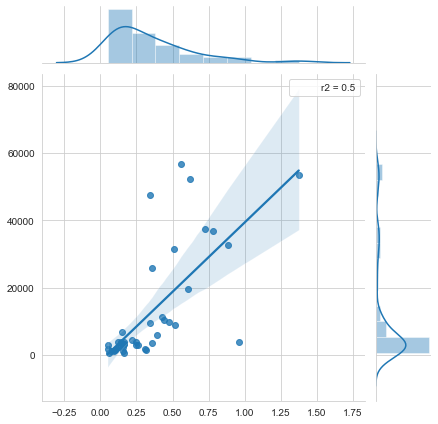

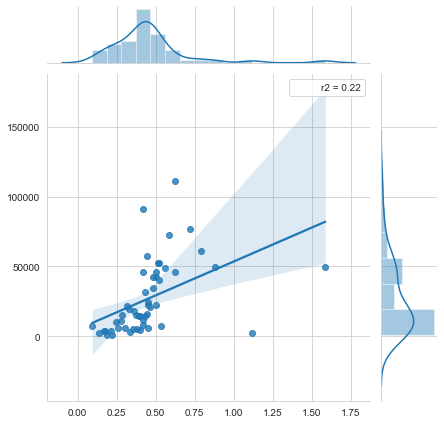

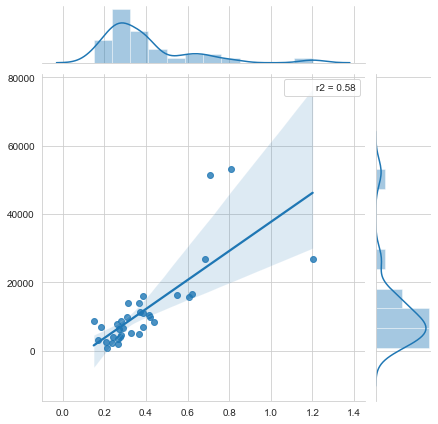

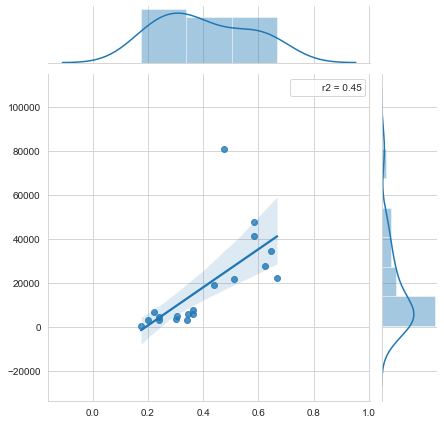

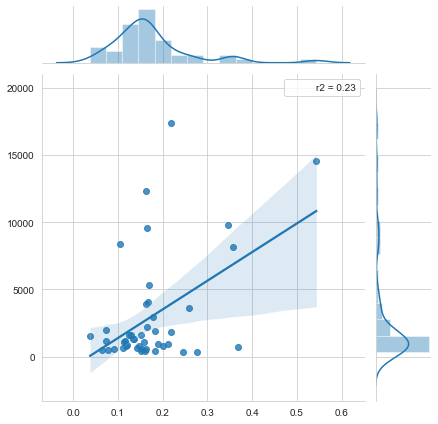

In [68]:
# Slicing Dataframe into Individual Continent Dataframe Sets

# East Asia + South Asia
EAS_SAS_df = continent_df.loc[(continent_df['region_id'] == 'EAS') | (continent_df['region_id'] == 'SAS')]
x_EAS_SAS = EAS_SAS_df['Normalised Annual Total MSW'].tolist()
y_EAS_SAS = EAS_SAS_df['Normalised GDP'].tolist()
sns.jointplot(x_EAS_SAS, y_EAS_SAS, kind='reg', stat_func=r2)

# Europe minus United Kingdom
ECS_df = continent_df.loc[continent_df['region_id'] == 'ECS']
x_ECS = ECS_df['Normalised Annual Total MSW'].tolist()
y_ECS = ECS_df['Normalised GDP'].tolist()
sns.jointplot(x_ECS, y_ECS, kind='reg', stat_func=r2)

# Latin America (South America) + North America 
LCN_NAC_df = continent_df.loc[(continent_df['region_id'] == 'LCN') | (continent_df['region_id'] == 'NAC')]
x_LCN_NAC = LCN_NAC_df['Normalised Annual Total MSW'].tolist()
y_LCN_NAC = LCN_NAC_df['Normalised GDP'].tolist()
sns.jointplot(x_LCN_NAC, y_LCN_NAC, kind='reg', stat_func=r2)

# Middle East
MEA_df = continent_df.loc[continent_df['region_id'] == 'MEA']
x_MEA = MEA_df['Normalised Annual Total MSW'].tolist()
y_MEA = MEA_df['Normalised GDP'].tolist()
sns.jointplot(x_MEA, y_MEA, kind='reg', stat_func=r2)

# Africa
SSF_df = continent_df.loc[continent_df['region_id'] == 'SSF']
x_SSF = SSF_df['Normalised Annual Total MSW'].tolist()
y_SSF = SSF_df['Normalised GDP'].tolist()
sns.jointplot(x_SSF, y_SSF, kind='reg', stat_func=r2)

In [161]:
# Countries with similar economic and development levels with Singapore

percentile_75 = clean_global_df['Normalised GDP'].quantile(0.75)
percentile_100 = clean_global_df['Normalised GDP'].quantile(1)

rich_global_df = clean_global_df
to_drop = []

for i in range(0, len(rich_global_df['Normalised GDP'])):
    if rich_global_df['Normalised GDP'][i] <= percentile_75:
        to_drop.append(i)
        
rich_global_df_f = rich_global_df.drop(rich_global_df.index[to_drop])
rich_global_df_f

,region_id,country_name,gdp,population,total msw,Normalised GDP,Normalised Annual Total MSW
0,LCN,Aruba,NaN,103187.0,8.813202e+04,NaN,0.8541
4,ECS,Andorra,3.319880e+09,82431.0,4.300000e+04,40275,0.521648
5,MEA,United Arab Emirates,3.842225e+11,9269612.0,5.413453e+06,41450,0.584
10,EAS,Australia,1.349305e+12,23789338.0,1.334500e+07,56719,0.560966
11,ECS,Austria,4.200405e+11,8633169.0,4.836000e+06,48654,0.560165
...,...,...,...,...,...,...,...
198,EAS,NaN,NaN,23434000.0,7.336000e+06,NaN,0.313049
203,NAC,United States,1.692033e+13,318563456.0,2.580000e+08,53114,0.809886
206,LCN,"Venezuela, RB",NaN,29893080.0,9.779093e+06,NaN,0.327136
207,LCN,British Virgin Islands,NaN,20645.0,2.109919e+04,NaN,1.022


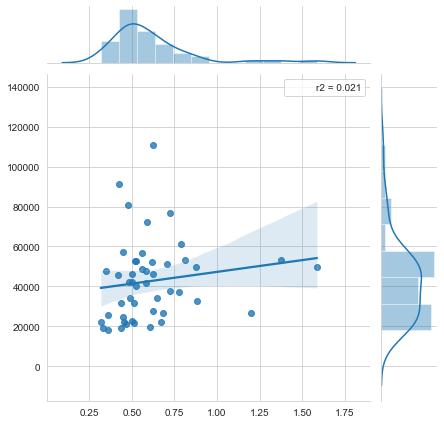

In [162]:
# Relationship between MSW and GDP for Rich Countries

x_rich = rich_global_df_f['Normalised Annual Total MSW'].tolist()
y_rich = rich_global_df_f['Normalised GDP'].tolist()
sns.jointplot(x_rich, y_rich, kind='reg', stat_func=r2)